## Effective Slippage
if $p$ is the effective price and $p_i^j$ is the spot price, we compute effective slippage as
$$
\frac{p}{p_i^j} - 1
$$

Note that $C = \frac{Q_2}{Q_1}$, and $V = \frac{\Delta R_1}{R_1}$.

We get
$$
\frac{1}{V}\frac{C(VR_1 - f_T)(1 - f_P)}{C(R_1 + VR_1 - f_T) + (VR_1 - f_T)(1 - f_P)}(1 - f_A) - 1
$$

### $f_T$ negligible compared to transaction size
$$
\frac{1 - f_P}{1 + V + \frac{V}{C}(1 - f_P)}(1 - f_A) - 1
$$

### $f_P = f_A$
$$
\frac{(1 - f_P)^2}{1 + V + \frac{V}{C}(1 - f_P)} - 1
$$

We are interested in fixing $C$, and looking at how effective slippage changes with $V$ and $f_P = f_A$.

[[-0.00019996 -0.0003999  -0.00059982 ... -0.00957553 -0.00977453
  -0.00997351]
 [-0.00039984 -0.00059973 -0.0007996  ... -0.00977307 -0.00997202
  -0.01017095]
 [-0.00059964 -0.00079948 -0.0009993  ... -0.00997053 -0.01016943
  -0.01036831]
 ...
 [-0.0190308  -0.01922605 -0.01942128 ... -0.02818678 -0.02838113
  -0.02857545]
 [-0.01922322 -0.01941843 -0.01961361 ... -0.02837697 -0.02857127
  -0.02876555]
 [-0.01941557 -0.01961073 -0.01980586 ... -0.02856708 -0.02876133
  -0.02895556]]


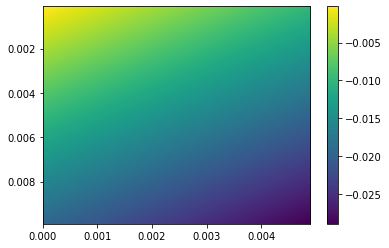

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# set variables & parameters

C = 1
fee = [0.0001*i for i in range(50)]
V = [0.0001*i for i in range(1,100)]

#create matrix for comparison
m = len(V)
n = len(fee)
slippage = np.ndarray(shape = (m,n), dtype = np.double)

# index matrix
#better_index = ["X1", "X2", "Y1", "Y2", "Y3"]
#matrix.index = better_index

def eff_slippage(V, fee, C):
    return (1 - fee)**2 / (1 + V + V/C*(1 - fee)) - 1

# fill in matrix with calculation results
for i in range(len(V)):
    for j in range(len(fee)):
        slippage[i][j] = eff_slippage(V[i], fee[j], C)




def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis', aspect='auto', extent=[min(fee),max(fee),max(V), min(V)])
    plt.colorbar()
    plt.show()


print(slippage)
heatmap2d(slippage)

We'd like to solve for $f_P$
$$
s = \frac{(1 - f_P)^2}{1 + V + \frac{V}{C}(1 - f_P)} - 1\\
(s + 1) (1 + V + \frac{V}{C}x)= x^2\\
(s + 1) (1 + V) + (s + 1)\frac{V}{C}x= x^2\\
0 = x^2 - (s + 1)\frac{V}{C}x - (s + 1) (1 + V)\\
$$
Thus
$$
a = 1\\
b = - (s + 1)\frac{V}{C}\\
c = - (s + 1) (1 + V)
$$
So
$$
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} = \frac{(s + 1)\frac{V}{C} \pm \sqrt{((s + 1)\frac{V}{C})^2 + 4(s + 1) (1 + V)}}{2}\\
x = \frac{(s + 1)\frac{V}{C} \pm (s + 1)\frac{V}{C}\sqrt{1 + 4\left(\frac{C}{V}\right)^2\frac{(1 + V)}{(s + 1)}}}{2}\\
$$
sign must be plus for $x$ to be positive, so
$$
x = (s + 1)\frac{V}{C}\frac{1 + \sqrt{1 + 4\left(\frac{C}{V}\right)^2\frac{(1 + V)}{(s + 1)}}}{2}\\
f_P = 1 - (s + 1)\frac{V}{C}\frac{1 + \sqrt{1 + 4\left(\frac{C}{V}\right)^2\frac{(1 + V)}{(s + 1)}}}{2}
$$

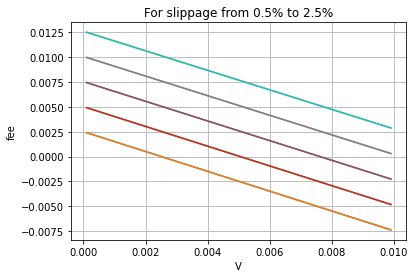

In [56]:
def fee_from_slippage(V, S, C):
    return 1 - V/C * (S+1) * (1 + np.sqrt(1 + 4*(C/V)**2*(1 + V)/(1+S)))/2
def fee_lin(V, S, C):  # approx for when C/V >> 1
    return 1 - V/C * (S+1) * (1 + np.sqrt(4*(C/V)**2*(1 + V)/(1+S)))/2

S = [-0.005*i for i in range(1,6)]
C = 1
fig, ax = plt.subplots()

for s in S:
    
    fee_derived = [fee_from_slippage(v, s, C) for v in V]
    fees_2 = [fee_lin(v, s, C) for v in V]

    ax.plot(V, fee_derived)
    ax.plot(V, fees_2)



ax.set(xlabel='V', ylabel='fee',
       title='For slippage from 0.5% to 2.5%')
ax.grid()
plt.show()

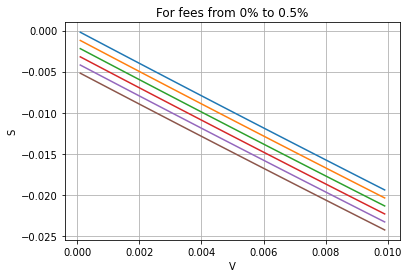

In [58]:

# note that the actual fee is about twice this, so really this ranges from 0 to 0.5% fees, approximately.
fees = [0.0005*i for i in range(6)]
V = [0.0001*i for i in range(1,100)]
C = 1
fig, ax = plt.subplots()

for fee in fees:
    
    S = [eff_slippage(v, fee, C) for v in V]

    ax.plot(V, S)


ax.set(xlabel='V', ylabel='S',
       title='For fees from 0% to 0.5%')
ax.grid()
plt.show()